In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("olympics_medals_country_wise.csv")

In [3]:
df.head()

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [4]:
df.shape

(156, 17)

In [5]:
df.columns

Index(['countries ', 'ioc_code ', 'summer_participations', 'summer_gold',
       'summer_silver', 'summer_bronze', 'summer_total',
       'winter_participations', 'winter_gold', 'winter_silver',
       'winter_bronze', 'winter_total', 'total_participation', 'total_gold',
       'total_silver', 'total_bronze', 'total_total '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

In [7]:
df.rename(columns = {'total_total ':'total_total'}, inplace = True)

### Converting df['total_total'] to int

In [8]:
k=[]
for i in df['total_total']:
    i=i.replace(',','')
    k.append(i)

In [9]:
df['total_total']=pd.Series(k)

In [10]:
df['total_total']=df['total_total'].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

### Lets do the same thing with other columns

In [12]:
k=[]
for i in df['summer_total']:
    i=i.replace(',','')
    k.append(i)
df['summer_total']=pd.Series(k)
df['summer_total']=df['summer_total'].astype('int')

k=[]
for i in df['summer_gold']:
    i=i.replace(',','')
    k.append(i)
df['summer_gold']=pd.Series(k)
df['summer_gold']=df['summer_gold'].astype('int')

k=[]
for i in df['total_gold']:
    i=i.replace(',','')
    k.append(i)
df['total_gold']=pd.Series(k)
df['total_gold']=df['total_gold'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    int64 
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    int64 
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    int64 
 14  total_silver           156 non-null    int64 
 15  total_bronze           

### <font color='green'> Perfect </font>

In [14]:
df.describe()

,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
count,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,14.673077,35.00641,34.782051,37.775641,107.564103,7.314103,7.50641,7.487179,7.442308,22.435897,21.987179,42.512821,42.269231,45.217949,130.000000
std,7.432417,102.40996,86.085726,83.157105,269.793115,7.900024,22.23264,21.431808,20.126773,63.293498,13.948286,117.545461,101.547405,97.571102,314.843002
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,9.750000,0.00000,1.000000,1.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13.000000,0.000000,1.000000,1.000000,3.000000
50%,15.000000,3.00000,5.000000,6.000000,13.500000,4.500000,0.00000,0.000000,0.000000,0.000000,17.000000,3.000000,5.000000,7.500000,14.500000
75%,19.000000,24.50000,29.250000,31.250000,85.500000,11.000000,1.00000,2.000000,2.000000,6.000000,29.000000,26.250000,33.500000,37.000000,101.500000
max,29.000000,1060.00000,831.000000,738.000000,2629.000000,24.000000,148.00000,133.000000,124.000000,405.000000,53.000000,1173.000000,953.000000,833.000000,2959.000000


In [15]:
df.isnull().sum()

countries                0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

### So we do not need to handle missing Values

# <div class='alert alert-info'> Lets do some analysis </div>

In [16]:
df.head()

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [17]:
df.rename(columns = {'countries ':'countries'}, inplace = True)

## Lets see which Top 7 Country has won most number of medals (total_total)

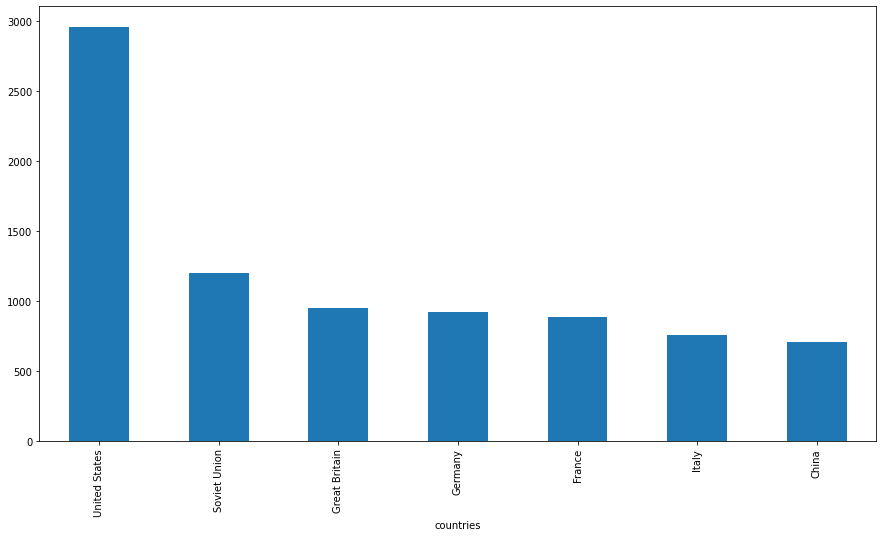

In [18]:
df.groupby('countries')['total_total'].sum().sort_values(ascending=False).head(7).plot.bar(figsize=(15,8));

##  Lets see which Country has won the maximum Gold(top 5)

<AxesSubplot: xlabel='countries'>

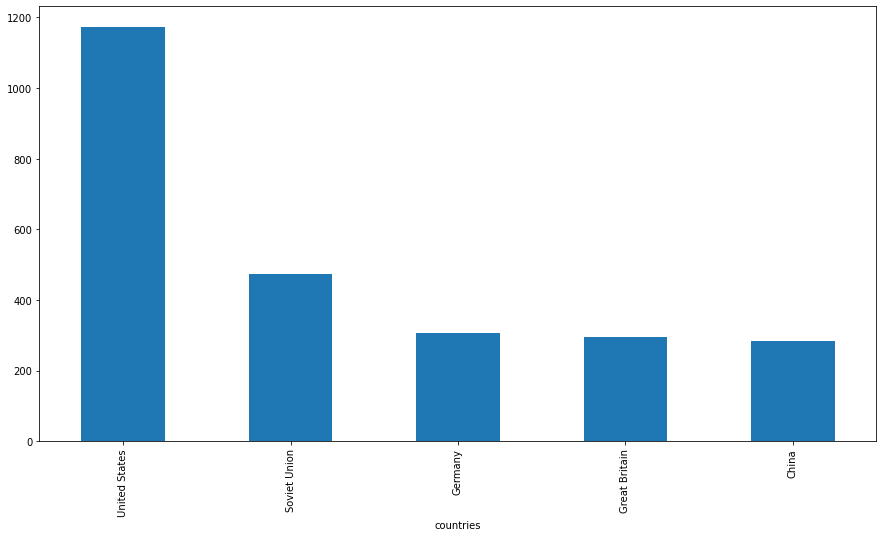

In [19]:
df.groupby('countries')['total_gold'].sum().sort_values(ascending=False).head().plot.bar(figsize=(15,8))

## Lets look at the correlation

/var/folders/4d/gf6xkqsd5tx6m_zltry403dc0000gn/T/ipykernel_1385/3014688087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=.2,ax=ax)


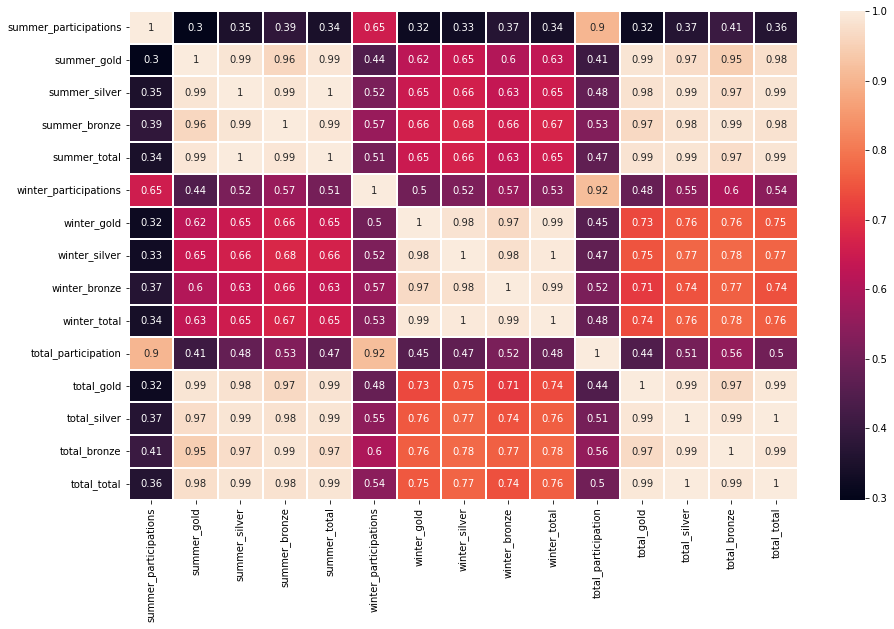

In [20]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linewidth=.2,ax=ax)
plt.xticks(rotation=90)
plt.show()

#  <div class='alert alert-warning'> Advance Data Visualisation with Dashboard </div>


## Lets create a Dashboard to see the correlation based on our own choice

In [21]:
import dash
from dash import html,dcc
from dash.dependencies import Input, Output
import plotly.graph_objs as go

In [22]:
app = dash.Dash()

 
features = df.columns
 
app.layout = html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='xaxis',
                options=[{'label': i, 'value': i} for i in features],
                value='summer_silver'
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),
 
        html.Div([
            dcc.Dropdown(
                id='yaxis',
                options=[{'label': i, 'value': i} for i in features],
                value='total_total'
            )
        ],style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),
 
    dcc.Graph(id='feature-graphic')
], style={'padding':10})
 


In [23]:
@app.callback(
    Output('feature-graphic', 'figure'),
    [Input('xaxis', 'value'),
     Input('yaxis', 'value')])

def update_graph(xaxis_name, yaxis_name):
    return {
        'data': [go.Scatter(
            x=df[xaxis_name],
            y=df[yaxis_name],
            mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            xaxis={'title': xaxis_name},
            yaxis={'title': yaxis_name},
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }
 
if __name__ == '__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:41] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 17:34:42] "POST /_dash-update-component HTTP/1.1" 200 -
